# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset diperoleh dari *Kaggle* dengan judul Loan Approval Classification Dataset.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [61]:
# Memuat dataset
df = pd.read_csv('../loan_data_raw/loan_data.csv')

# Menampilkan beberapa baris pertama
print(df.head())

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [62]:
# Menampilkan informasi dasar dataframe
print("Informasi Dasar DataFrame:")
df.info()

Informasi Dasar DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previ

In [63]:
# Menampilkan statistik deskriptif kolom numerik
print("\nStatistik Deskriptif Kolom Numerik:")
print(df.describe())


Statistik Deskriptif Kolom Numerik:
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                 

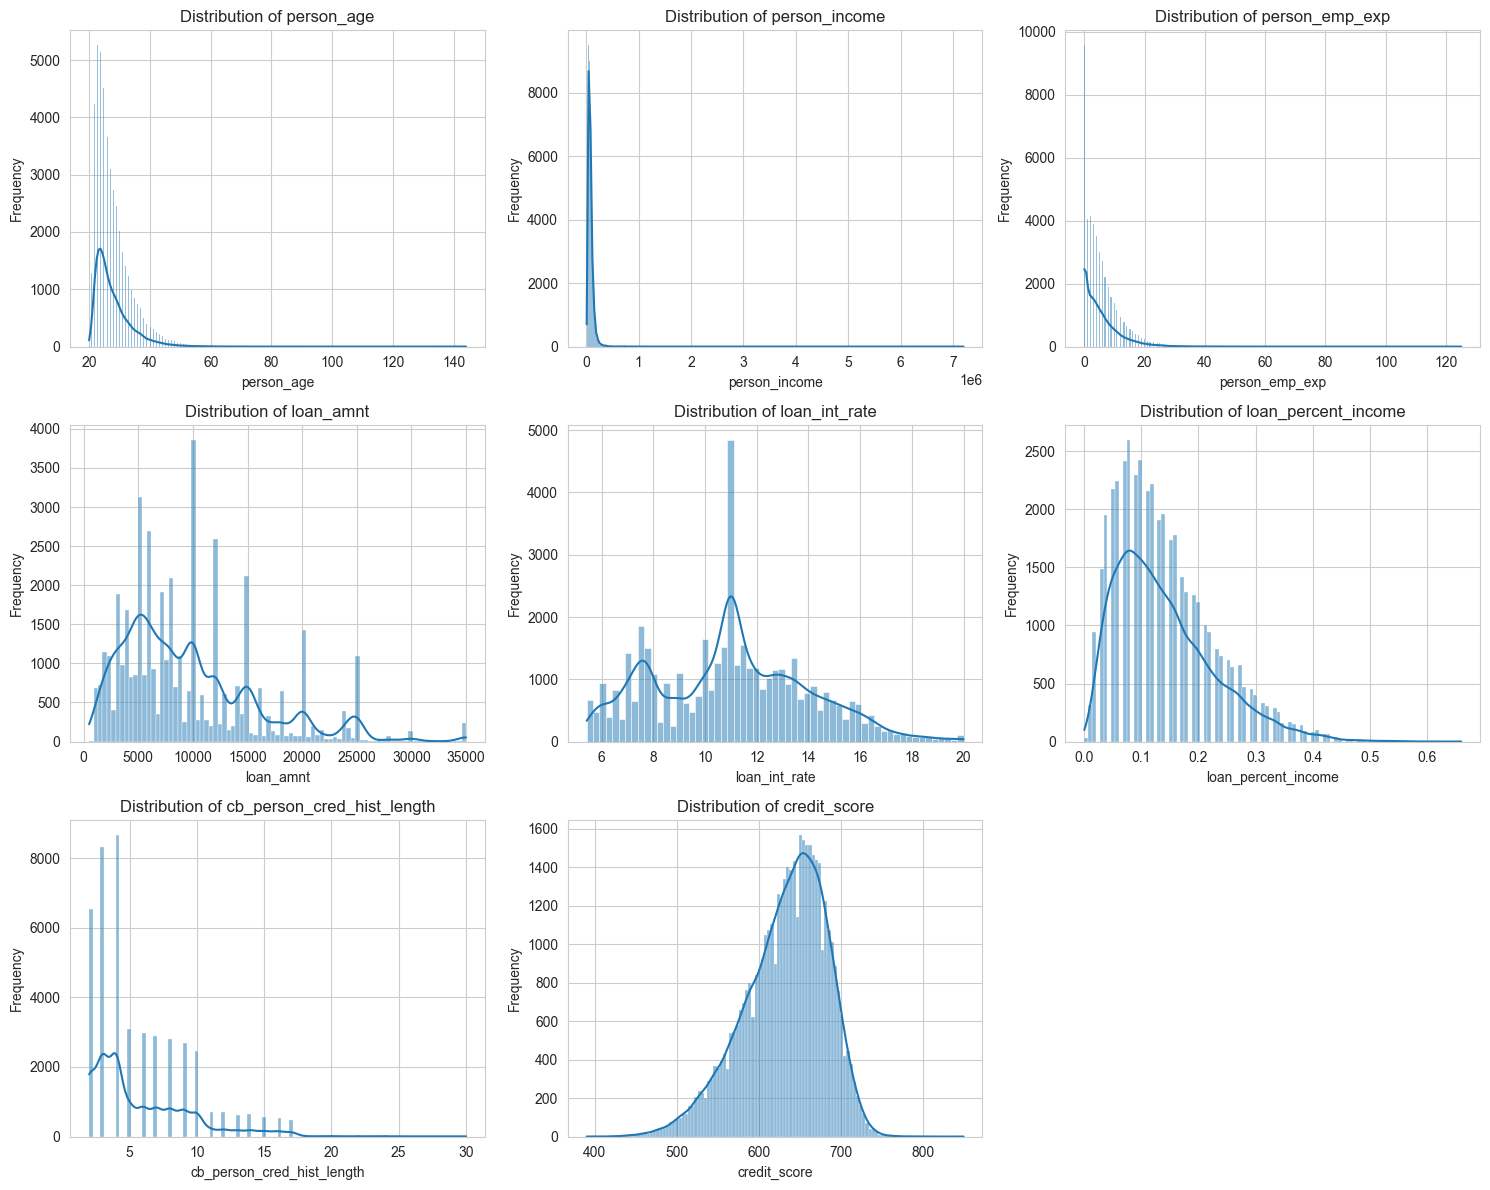

In [64]:
# Memvisualisasikan distribusi kolom numerik
sns.set_style("whitegrid")
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Hapus kolom target 'loan_status' dari daftar kolom numerik untuk visualisasi distribusi
if 'loan_status' in numerical_cols:
    numerical_cols.remove('loan_status')

# Membuat subplot untuk histogram
num_plots = len(numerical_cols)
num_cols_per_row = 3
num_rows = (num_plots + num_cols_per_row - 1) // num_cols_per_row

plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

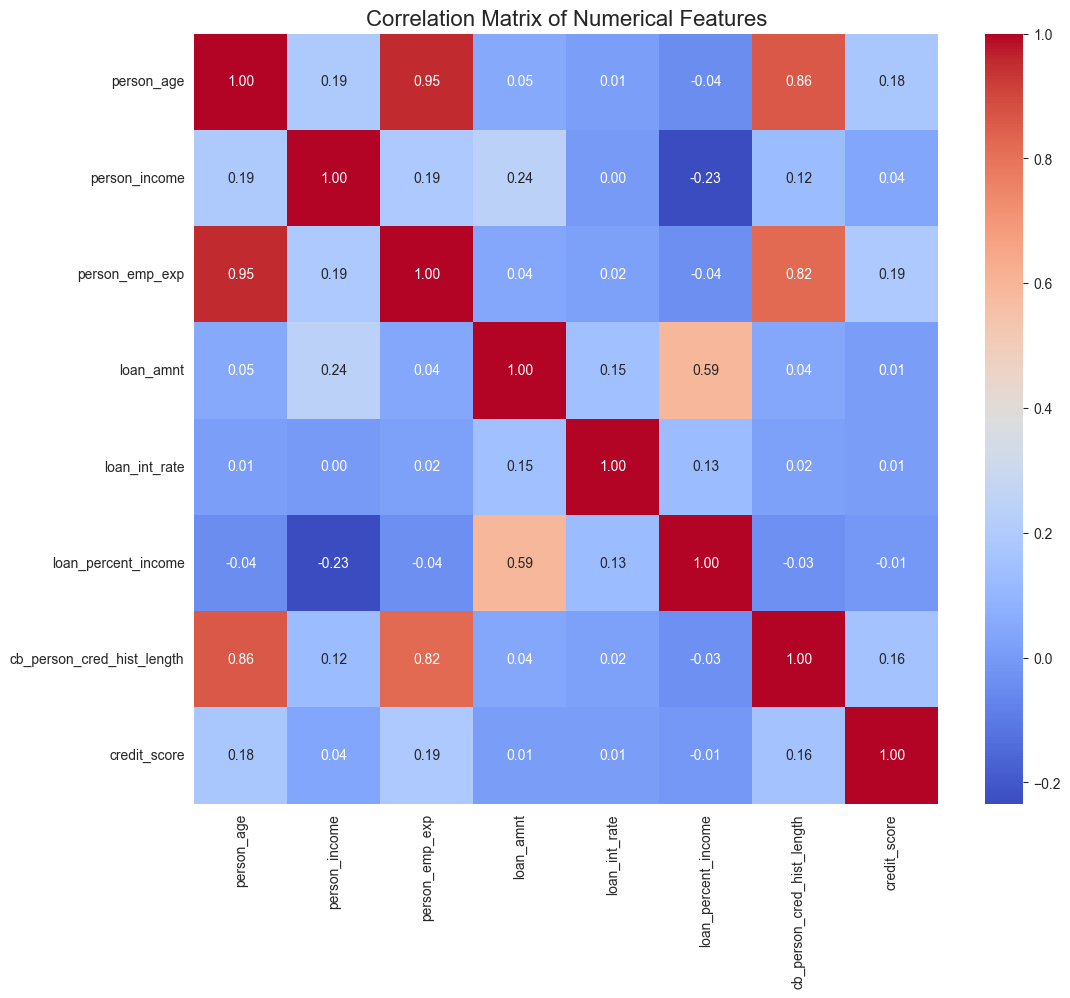

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

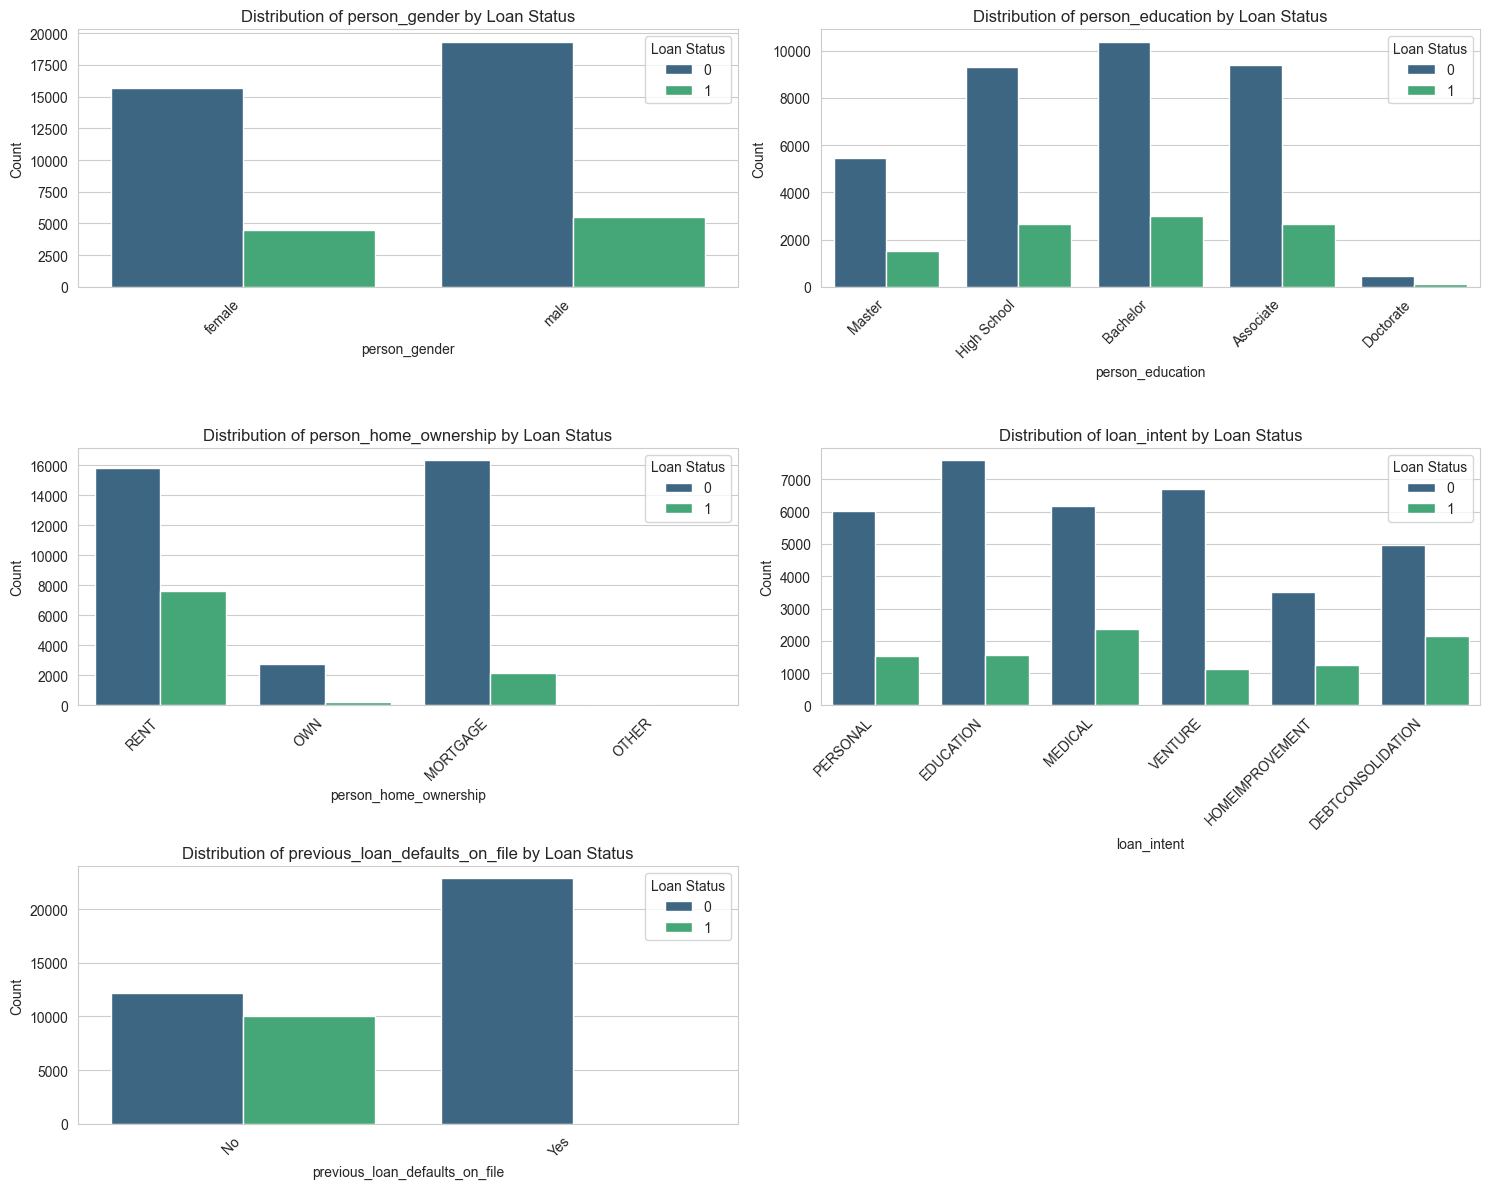

In [66]:
plt.figure(figsize=(15, 12))

# Analisis hubungan antar variabel
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1) # Adjust subplot grid as needed, e.g., 3 rows, 2 columns
    sns.countplot(data=df, x=col, hue='loan_status', palette='viridis')
    plt.title(f'Distribution of {col} by Loan Status', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [67]:

# --- 1. Pembersihan Data (Data Cleaning) ---
print("--- 1. Pembersihan Data Dasar ---")

# Menghapus data duplikat (jika ada) untuk menjaga integritas data
print(f"Jumlah baris sebelum hapus duplikat: {len(df)}")
df_clean = df.drop_duplicates()
print(f"Jumlah baris setelah hapus duplikat: {len(df_clean)}")

# Menangani missing values
print(f"Jumlah missing values sebelum drop:\n{df_clean.isnull().sum().sum()}")
df_clean = df_clean.dropna()
print(f"Jumlah baris setelah hapus missing values: {len(df_clean)}")

--- 1. Pembersihan Data Dasar ---
Jumlah baris sebelum hapus duplikat: 45000
Jumlah baris setelah hapus duplikat: 45000
Jumlah missing values sebelum drop:
0
Jumlah baris setelah hapus missing values: 45000


In [68]:
# --- 2. Deteksi dan Penanganan Outlier ---
print("\n--- 2. Deteksi dan Penanganan Outlier (Metode IQR) ---")

# Memilih kolom numerik untuk dicek outlier-nya
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'loan_status' in numeric_cols:
    numeric_cols.remove('loan_status')

# Menghapus outlier menggunakan Interquartile Range (IQR)
rows_before_outlier = len(df_clean)

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data hanya yang berada dalam range yang wajar
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print(f"Jumlah baris setelah pembersihan outlier: {len(df_clean)}")
print(f"Total data yang dibuang karena outlier: {rows_before_outlier - len(df_clean)}")


--- 2. Deteksi dan Penanganan Outlier (Metode IQR) ---
Jumlah baris setelah pembersihan outlier: 36065
Total data yang dibuang karena outlier: 8935


In [69]:
# Menghapus duplikat (jika ada)
df_clean = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df_clean)}")

Number of rows after removing duplicates: 45000


In [70]:
# Menangani missing values
df_clean = df_clean.dropna()
print(f"Number of rows after removing missing values: {len(df_clean)}")

Number of rows after removing missing values: 45000


In [71]:
# Encoding data kategorikal
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [72]:
# Simpan dataset hasil preprocessing
df_clean.to_csv('loan_data_cleaned.csv', index=False)

print("Dataset telah berhasil disimpan sebagai 'loan_data_cleaned.csv'")


Dataset telah berhasil disimpan sebagai 'loan_data_cleaned.csv'


In [73]:

df_clean = pd.read_csv('loan_data_cleaned.csv')
df_clean.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False
